<a href="https://colab.research.google.com/github/listguy/ML-Course-ipynb/blob/main/MajorHW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#HW1 - Data Exploration and Preparation

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pylab
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
randomState=79

params = {'xtick.labelsize': 18,
          'ytick.labelsize': 18,
          'axes.titlesize' : 22,
          'axes.labelsize' : 20,
          'legend.fontsize': 18,
          'legend.title_fontsize': 22,
          'figure.titlesize': 24 }
pylab.rcParams.update(params)

## Loading the dataset

In [52]:
# !rm *.csv
from google.colab import files
print("Please load the raw csv data")
uploadedData = files.upload()
filename = list(uploadedData)[0]

Please load the raw csv data


Saving virus_data.csv to virus_data (2).csv


In [53]:
dataset = pd.read_csv(filename)

In [54]:
dataset.shape

(1250, 26)

In [55]:
dataset.spread.value_counts()

-1    646
 1    604
Name: spread, dtype: int64

In [56]:

train_data, test_data = train_test_split(dataset, test_size=0.20, random_state=randomState)

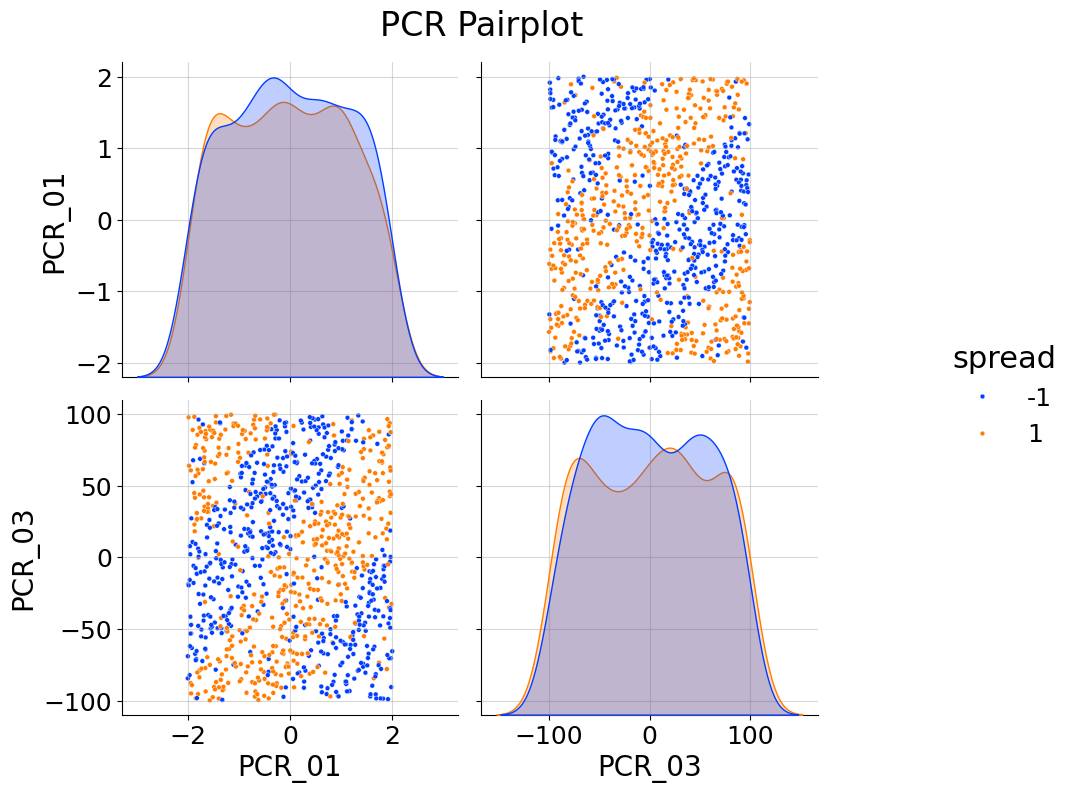

In [57]:
# Q5 - pairplots of PCR
g=sns.pairplot(train_data[['PCR_01','PCR_03', 'spread']], hue='spread', plot_kws={"s": 12}, palette='bright')
g.fig.suptitle("PCR Pairplot", y=1.04)
for ax in np.ravel(g.axes):
 ax.grid(alpha=0.5)
g.fig.set_size_inches(12,8)

In [58]:
# Q6 - Correlation of PCR and spread

print("Correlation of PCR_01 and spread is: {:.3f}".format(train_data['PCR_01'].corr(train_data['spread'])))
print("Correlation of PCR_03 and spread is: {:.3f}".format(train_data['PCR_03'].corr(train_data['spread'])))

Correlation of PCR_01 and spread is: -0.011
Correlation of PCR_03 and spread is: 0.003


In [59]:
# Q7 - KNN implementation
from sklearn.base import BaseEstimator,ClassifierMixin
from scipy.spatial.distance import cdist
class kNN(BaseEstimator, ClassifierMixin):

  def __init__(self, n_neighbors:int = 3):
    self.n_neighbors = n_neighbors


  def fit(self, X, y):
    self.data = np.copy(X)
    self.labels = np.copy(y)
    return self

  def predict(self, X):
    distances = cdist(X, self.data) # calculate distances from all neighbors
    nearestNeigborsIndices = np.argpartition(distances, self.n_neighbors)[:,:self.n_neighbors] # get indices of n_neighbors nearest neighbors
    nearestLabels = self.labels[nearestNeigborsIndices] # get labels for each indices row
    predictions = np.sign(np.sum(nearestLabels, axis=1)) # get prediction by majority

    return predictions





In [60]:
# visualize_clf.py
def visualize_clf(clf, X, Y, title,
                  xlabel, ylabel,
                  marker_size=50,
                  grid_length=300,
                  linewidths=None):
    import matplotlib.pyplot as plt
    import pandas as pd
    from matplotlib.colors import ListedColormap

    if isinstance(X, pd.DataFrame):
        X = X.to_numpy()

    # For internal use here, make sure labels are 0 and 1
    Y = np.ravel(Y).astype(int)
    labels = set(Y)
    assert len(labels) == 2, "Can only visualize two unique labels"

    if labels == set([-1,1]):
      Y = (Y + 1) // 2
      labels = set(Y)

    assert labels == set([0,1]), "Could not handle given labels"

    plt.figure(figsize=(8, 8))

    # Parameters
    n_classes = 2
    markers = ["D", "o"]
    palette = sns.color_palette("hls", 2)
    custom_cmap = ListedColormap(palette.as_hex())

    x_delta = np.abs(X[:, 0].max() - X[:, 0].min()) * 0.1
    y_delta = np.abs(X[:, 1].max() - X[:, 1].min()) * 0.1
    x_min, x_max = X[:, 0].min() - x_delta, X[:, 0].max() + x_delta
    y_min, y_max = X[:, 1].min() - y_delta, X[:, 1].max() + y_delta
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, grid_length),
                         np.linspace(y_min, y_max, grid_length))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cs = plt.contourf(xx, yy, Z, cmap=custom_cmap, alpha=0.35)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(alpha=0.75)

    # Plot the training points
    for i, color, marker in zip(labels, palette, markers):
        idx = np.where(Y == i)
        plt.scatter(X[idx, 0], X[idx, 1], color=color,
                    marker=marker,
                    edgecolor='white', s=marker_size,
                    linewidths=linewidths)

    plt.title(title, fontsize=20)
    plt.axis("tight")
    plt.show()


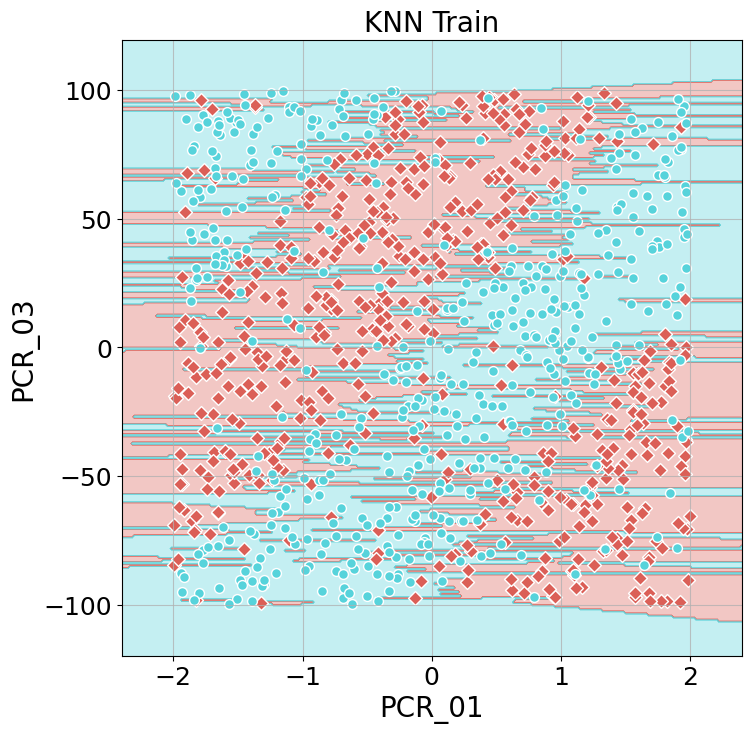

Train score🚄: 1.000
Test score:🧪 0.696


In [61]:
# Testing the prediction 🎉🥂🎉🙌🎁🎊

tempDF = train_data[["PCR_01","PCR_03"]]
tempY = train_data["spread"]

oneNNTest = kNN(1)
oneNNTest.fit(tempDF, tempY)
visualize_clf(oneNNTest,tempDF,tempY, "KNN Train", "PCR_01", "PCR_03") # visualize it filualize it
print("Train score🚄: {:.3f}".format(oneNNTest.score(tempDF, tempY)))
print("Test score:🧪 {:.3f}".format(oneNNTest.score(test_data[["PCR_01", "PCR_03"]], test_data["spread"])))


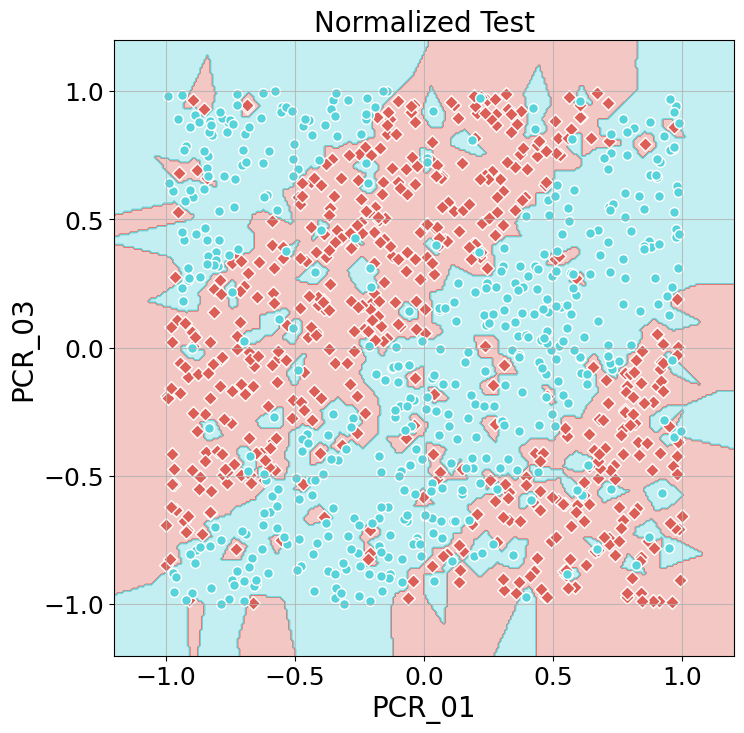

Train score🚄: 1.000
Test score:🧪 0.792


In [62]:
# normalized KNN ⬆
tempDF = train_data[["PCR_01","PCR_03"]]
tempY = train_data["spread"]
scaler = MinMaxScaler((-1,1))

normalizedX = scaler.fit_transform(tempDF)
normalizedTestX = scaler.fit_transform(test_data[["PCR_01","PCR_03"]])
oneNNTest = kNN(1)
oneNNTest.fit(normalizedX, tempY)
visualize_clf(oneNNTest,normalizedX,tempY, "Normalized Test", "PCR_01", "PCR_03") # visualize it filualize it
oneNNTest.score(normalizedX, tempY)
oneNNTest.score(normalizedTestX, test_data['spread'])

print("Train score🚄: {:.3f}".format(oneNNTest.score(normalizedX, tempY)))
print("Test score:🧪 {:.3f}".format(oneNNTest.score(normalizedTestX, test_data["spread"])))



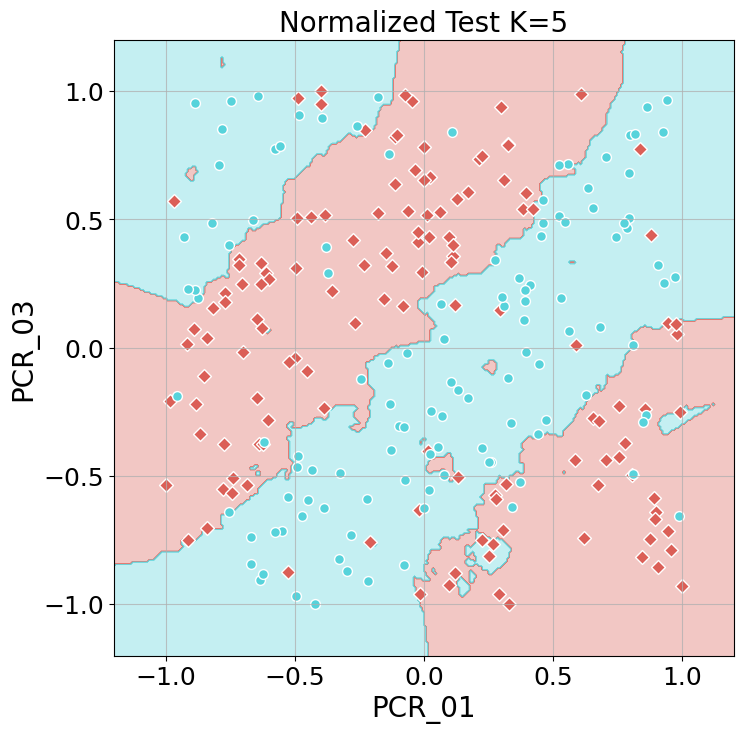

Train score🚄: 0.879
Test score:🧪 0.856


In [63]:
fiveNNTest = kNN(5)
fiveNNTest.fit(normalizedX, tempY)
visualize_clf(fiveNNTest,normalizedTestX,test_data['spread'], "Normalized Test K=5", "PCR_01", "PCR_03") # visualize it filualize it
fiveNNTest.score(normalizedTestX, test_data['spread'])

print("Train score🚄: {:.3f}".format(fiveNNTest.score(normalizedX, tempY)))
print("Test score:🧪 {:.3f}".format(fiveNNTest.score(normalizedTestX, test_data["spread"])))

In [64]:
# Change blood type represantation

train_data.insert(train_data.columns.get_loc("blood_type"),"SpecialProperty",train_data["blood_type"].isin(["O+", "B+"]))
train_data.drop("blood_type", axis=1, inplace=True)
train_data

patient_id  age sex  weight  SpecialProperty  \
319         1476    4   F    15.4            False   
638         1587   16   M    43.0             True   
324         1073   37   F    63.5            False   
697          957   25   M    43.5            False   
966           83   28   F    65.3             True   
...          ...  ...  ..     ...              ...   
148          267   37   F    72.0            False   
835         1186   24   M    82.9            False   
1098        1000   18   M    44.2             True   
1213         724   22   M    58.2            False   
343          776    7   F    28.2             True   

                current_location  num_of_siblings  happiness_score  \
319   ('-19.32556', '-41.25528')                0               10   
638      ('48.35149', '8.96317')                3               10   
324    ('41.27621', '-72.86843')                3                8   
697     ('-0.35817', '42.54536')                1                8   
966    ('40.60538', '-73.75513')                2               11   
...                          ...              ...              ...   
148      ('58.1908', '40.17171')                2                9   
835     ('6.25947', '102.05461')                1                8   
1098  ('36.06523', '-119.01677')                1               11   
1213   ('35.25064', '-91.73625')                0               10   
343    ('23.15678', '-81.24441')                0               11   

      household_income  conversations_per_day  ...     PCR_03     PCR_04  \
319                  0                      7  ... -87.015922  -2.109242   
638                  2                      1  ...  92.740335  -7.180198   
324                  1                      2  ... -65.518385  -2.578693   
697                  3                      4  ...  49.351361 -10.236166   
966                  2                      5  ...  70.677526  -4.055558   
...                ...                    ...  ...        ...        ...   
148                  1                      1  ... -55.156231  -5.132687   
835                  2                      7  ... -78.164489  -9.408123   
1098                 6                      2  ... -33.905459  -7.730103   
1213                 1                      2  ... -67.567661  -5.332240   
343                  5                     10  ... -12.668906  -6.690637   

          PCR_05     PCR_06    PCR_07     PCR_08    PCR_09     PCR_10  spread  \
319   148.335406  -6.068478  0.720547   3.860767  5.729131  -9.943844       1   
638   169.347608  19.170203  3.584327   3.794505 -2.327488  -5.625047      -1   
324   107.168891  23.480930  5.197697   7.245606  2.883810   0.954116       1   
697   258.331733  -3.795412 -1.401057   2.162551 -7.276843  -4.983045      -1   
966   130.887545   0.241004  2.956907   7.872093  1.276840  -7.911564       1   
...          ...        ...       ...        ...       ...        ...     ...   
148   107.686185  24.516843  6.409112   9.465275  0.559413 -11.604748      -1   
835   137.519520 -26.116126  2.238280  18.392702 -4.484315  -6.415397       1   
1098   68.139417  -6.041303 -0.799432   1.394715 -4.974855  -6.074327      -1   
1213   87.150704  14.011247  3.928302   1.663961 -0.404966  -6.500909      -1   
343   219.679646   4.670664  0.659772   5.733211 -3.965300  -6.767549      -1   

      risk  
319     -1  
638      1  
324     -1  
697      1  
966      1  
...    ...  
148     -1  
835     -1  
1098    -1  
1213     1  
343     -1  

[1000 rows x 26 columns]

In [65]:
# change symptoms columns

# List of symptoms to create columns for
symptoms_list = ['sore_throat', 'cough', 'shortness_of_breath', 'fever', 'smell_loss']

# Create a new column for each symptom
for symptom in symptoms_list:
    train_data[symptom] = train_data['symptoms'].str.contains(symptom, na=False)

# Optionally convert boolean columns to integers
for symptom in symptoms_list:
    train_data[symptom] = train_data[symptom].astype(int)

train_data.drop("symptoms", axis=1, inplace=True)

train_data


patient_id  age sex  weight  SpecialProperty  \
319         1476    4   F    15.4            False   
638         1587   16   M    43.0             True   
324         1073   37   F    63.5            False   
697          957   25   M    43.5            False   
966           83   28   F    65.3             True   
...          ...  ...  ..     ...              ...   
148          267   37   F    72.0            False   
835         1186   24   M    82.9            False   
1098        1000   18   M    44.2             True   
1213         724   22   M    58.2            False   
343          776    7   F    28.2             True   

                current_location  num_of_siblings  happiness_score  \
319   ('-19.32556', '-41.25528')                0               10   
638      ('48.35149', '8.96317')                3               10   
324    ('41.27621', '-72.86843')                3                8   
697     ('-0.35817', '42.54536')                1                8   
966    ('40.60538', '-73.75513')                2               11   
...                          ...              ...              ...   
148      ('58.1908', '40.17171')                2                9   
835     ('6.25947', '102.05461')                1                8   
1098  ('36.06523', '-119.01677')                1               11   
1213   ('35.25064', '-91.73625')                0               10   
343    ('23.15678', '-81.24441')                0               11   

      household_income  conversations_per_day  ...     PCR_08    PCR_09  \
319                  0                      7  ...   3.860767  5.729131   
638                  2                      1  ...   3.794505 -2.327488   
324                  1                      2  ...   7.245606  2.883810   
697                  3                      4  ...   2.162551 -7.276843   
966                  2                      5  ...   7.872093  1.276840   
...                ...                    ...  ...        ...       ...   
148                  1                      1  ...   9.465275  0.559413   
835                  2                      7  ...  18.392702 -4.484315   
1098                 6                      2  ...   1.394715 -4.974855   
1213                 1                      2  ...   1.663961 -0.404966   
343                  5                     10  ...   5.733211 -3.965300   

         PCR_10  spread  risk  sore_throat  cough  shortness_of_breath  fever  \
319   -9.943844       1    -1            0      1                    1      1   
638   -5.625047      -1     1            0      0                    0      1   
324    0.954116       1    -1            1      0                    0      0   
697   -4.983045      -1     1            0      0                    0      0   
966   -7.911564       1     1            0      0                    0      0   
...         ...     ...   ...          ...    ...                  ...    ...   
148  -11.604748      -1    -1            0      0                    1      0   
835   -6.415397       1    -1            1      1                    1      0   
1098  -6.074327      -1    -1            1      1                    1      0   
1213  -6.500909      -1     1            0      0                    0      0   
343   -6.767549      -1    -1            0      0                    0      0   

      smell_loss  
319            1  
638            0  
324            0  
697            1  
966            0  
...          ...  
148            0  
835            0  
1098           0  
1213           1  
343            0  

[1000 rows x 30 columns]

In [66]:
train_data.drop(["patient_id", "current_location","pcr_date", ], axis=1, inplace=True)
train_data["male"] = train_data["sex"].apply(lambda sex: int(sex == "M"))
train_data.drop("sex", axis=1, inplace=True)
train_data["SpecialProperty"] = train_data["SpecialProperty"].astype(int)


train_data

age  weight  SpecialProperty  num_of_siblings  happiness_score  \
319     4    15.4                0                0               10   
638    16    43.0                1                3               10   
324    37    63.5                0                3                8   
697    25    43.5                0                1                8   
966    28    65.3                1                2               11   
...   ...     ...              ...              ...              ...   
148    37    72.0                0                2                9   
835    24    82.9                0                1                8   
1098   18    44.2                1                1               11   
1213   22    58.2                0                0               10   
343     7    28.2                1                0               11   

      household_income  conversations_per_day  sugar_levels  sport_activity  \
319                  0                      7            59               2   
638                  2                      1            66               2   
324                  1                      2            75               1   
697                  3                      4            83               0   
966                  2                      5            79               0   
...                ...                    ...           ...             ...   
148                  1                      1           104               2   
835                  2                      7            97               2   
1098                 6                      2            86               3   
1213                 1                      2           100               1   
343                  5                     10            74               0   

        PCR_01  ...    PCR_09     PCR_10  spread  risk  sore_throat  cough  \
319  -0.739114  ...  5.729131  -9.943844       1    -1            0      1   
638  -1.703738  ... -2.327488  -5.625047      -1     1            0      0   
324   0.010646  ...  2.883810   0.954116       1    -1            1      0   
697  -0.348491  ... -7.276843  -4.983045      -1     1            0      0   
966  -1.407149  ...  1.276840  -7.911564       1     1            0      0   
...        ...  ...       ...        ...     ...   ...          ...    ...   
148  -1.736936  ...  0.559413 -11.604748      -1    -1            0      0   
835  -0.567677  ... -4.484315  -6.415397       1    -1            1      1   
1098  1.528107  ... -4.974855  -6.074327      -1    -1            1      1   
1213  0.740066  ... -0.404966  -6.500909      -1     1            0      0   
343   1.406136  ... -3.965300  -6.767549      -1    -1            0      0   

      shortness_of_breath  fever  smell_loss  male  
319                     1      1           1     0  
638                     0      1           0     1  
324                     0      0           0     0  
697                     0      0           1     1  
966                     0      0           0     0  
...                   ...    ...         ...   ...  
148                     1      0           0     0  
835                     1      0           0     1  
1098                    1      0           0     1  
1213                    0      0           1     1  
343                     0      0           0     0  

[1000 rows x 27 columns]

<hr></hr>

In [67]:
train_data.columns
train_data["sugar_levels"] = train_data["sugar_levels"].astype(float)

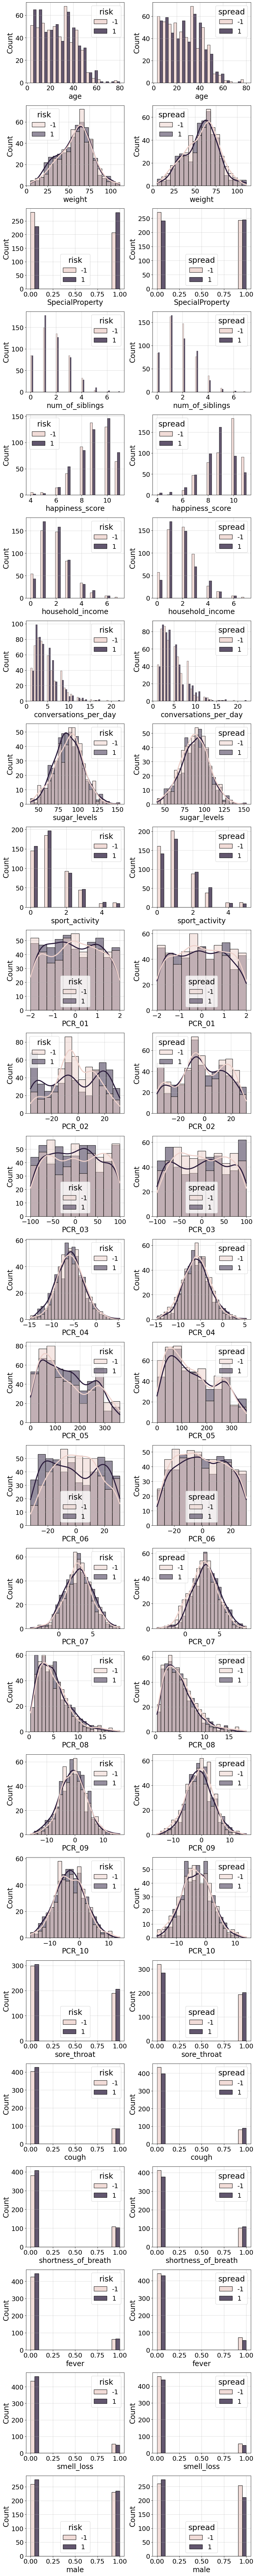

In [68]:
# Plot alot

COL_NAME = ['age', 'weight', 'SpecialProperty', 'num_of_siblings',
       'happiness_score', 'household_income', 'conversations_per_day',
       'sugar_levels', 'sport_activity', 'PCR_01', 'PCR_02', 'PCR_03',
       'PCR_04', 'PCR_05', 'PCR_06', 'PCR_07', 'PCR_08', 'PCR_09', 'PCR_10',
       'sore_throat', 'cough', 'shortness_of_breath',
       'fever', 'smell_loss', 'male']

COLS, ROWS = (2, len(COL_NAME))
plt.figure(figsize=(5 * COLS, 4 * ROWS))

for row in range(ROWS):
  column = COL_NAME[row]

  for j, cls in enumerate(["risk", "spread"]):
    plt.subplot(ROWS,COLS, row * COLS + 1 + j)

    isContinuous = "float" in train_data[column].dtype.name
    sns.histplot(data=train_data, x=column, hue=cls, line_kws={"linewidth": 3},
                 kde=isContinuous, multiple="layer" if isContinuous else "dodge")

    plt.grid(alpha=0.5)
plt.tight_layout()


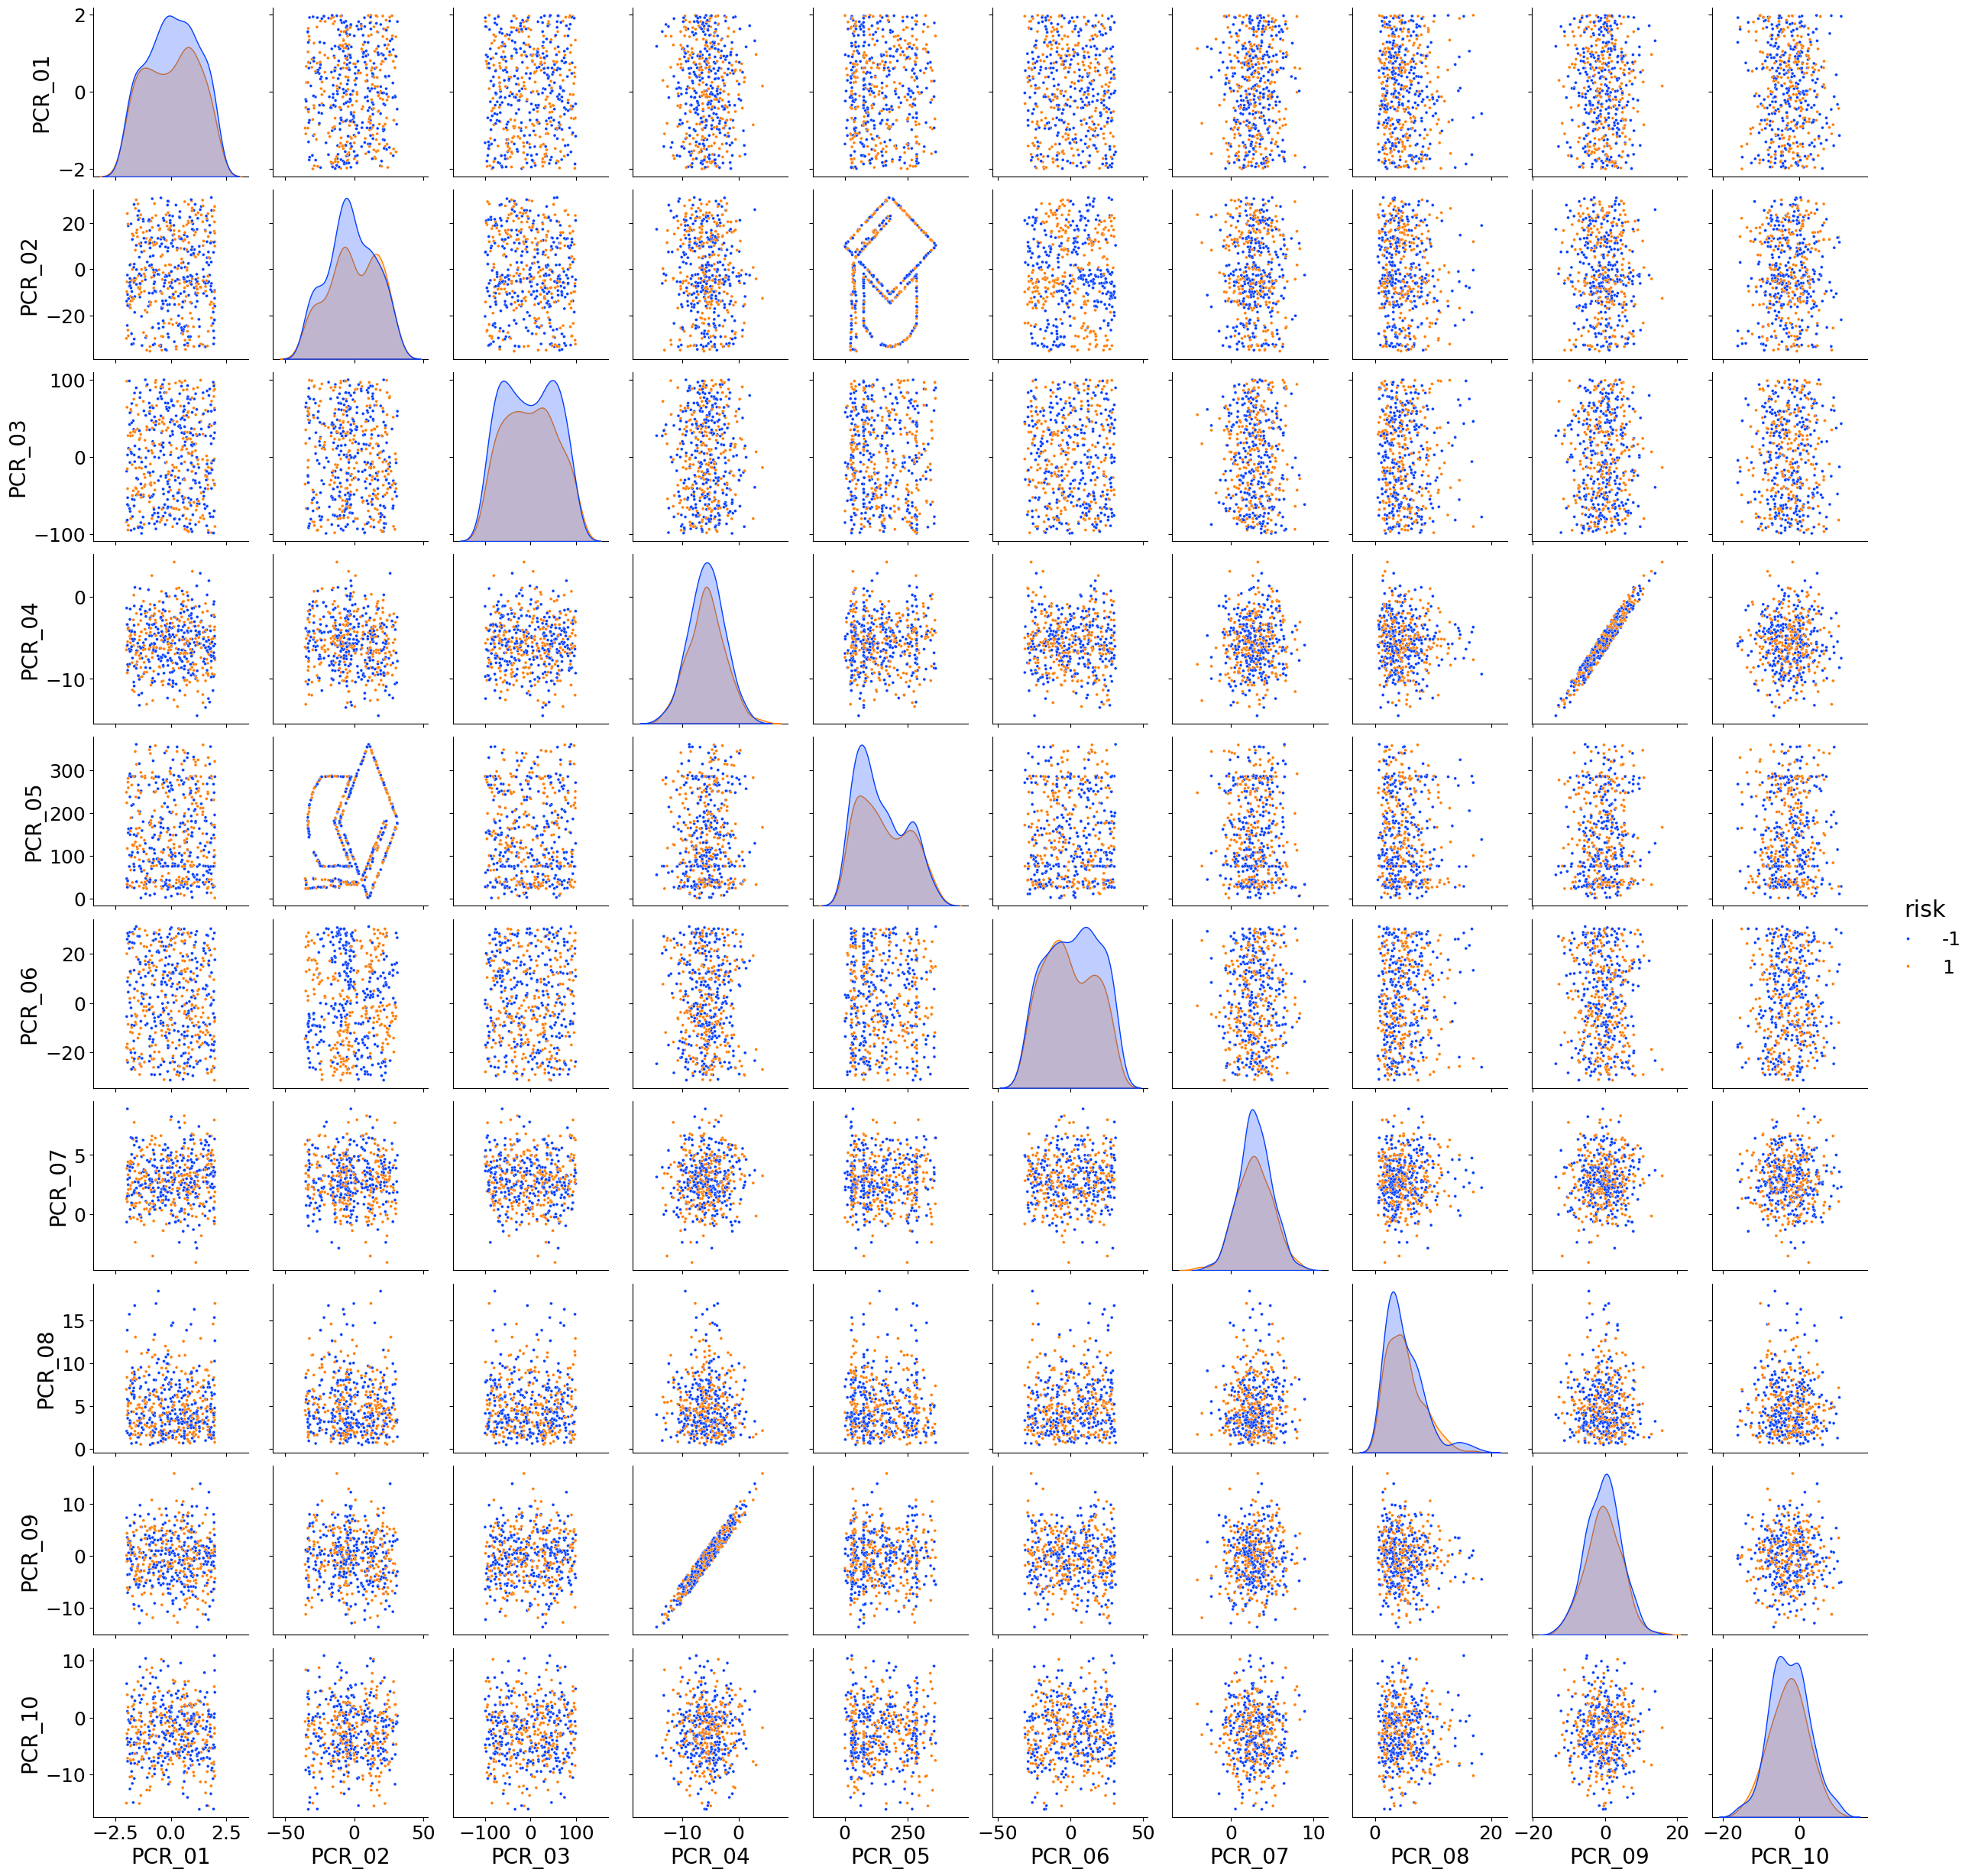

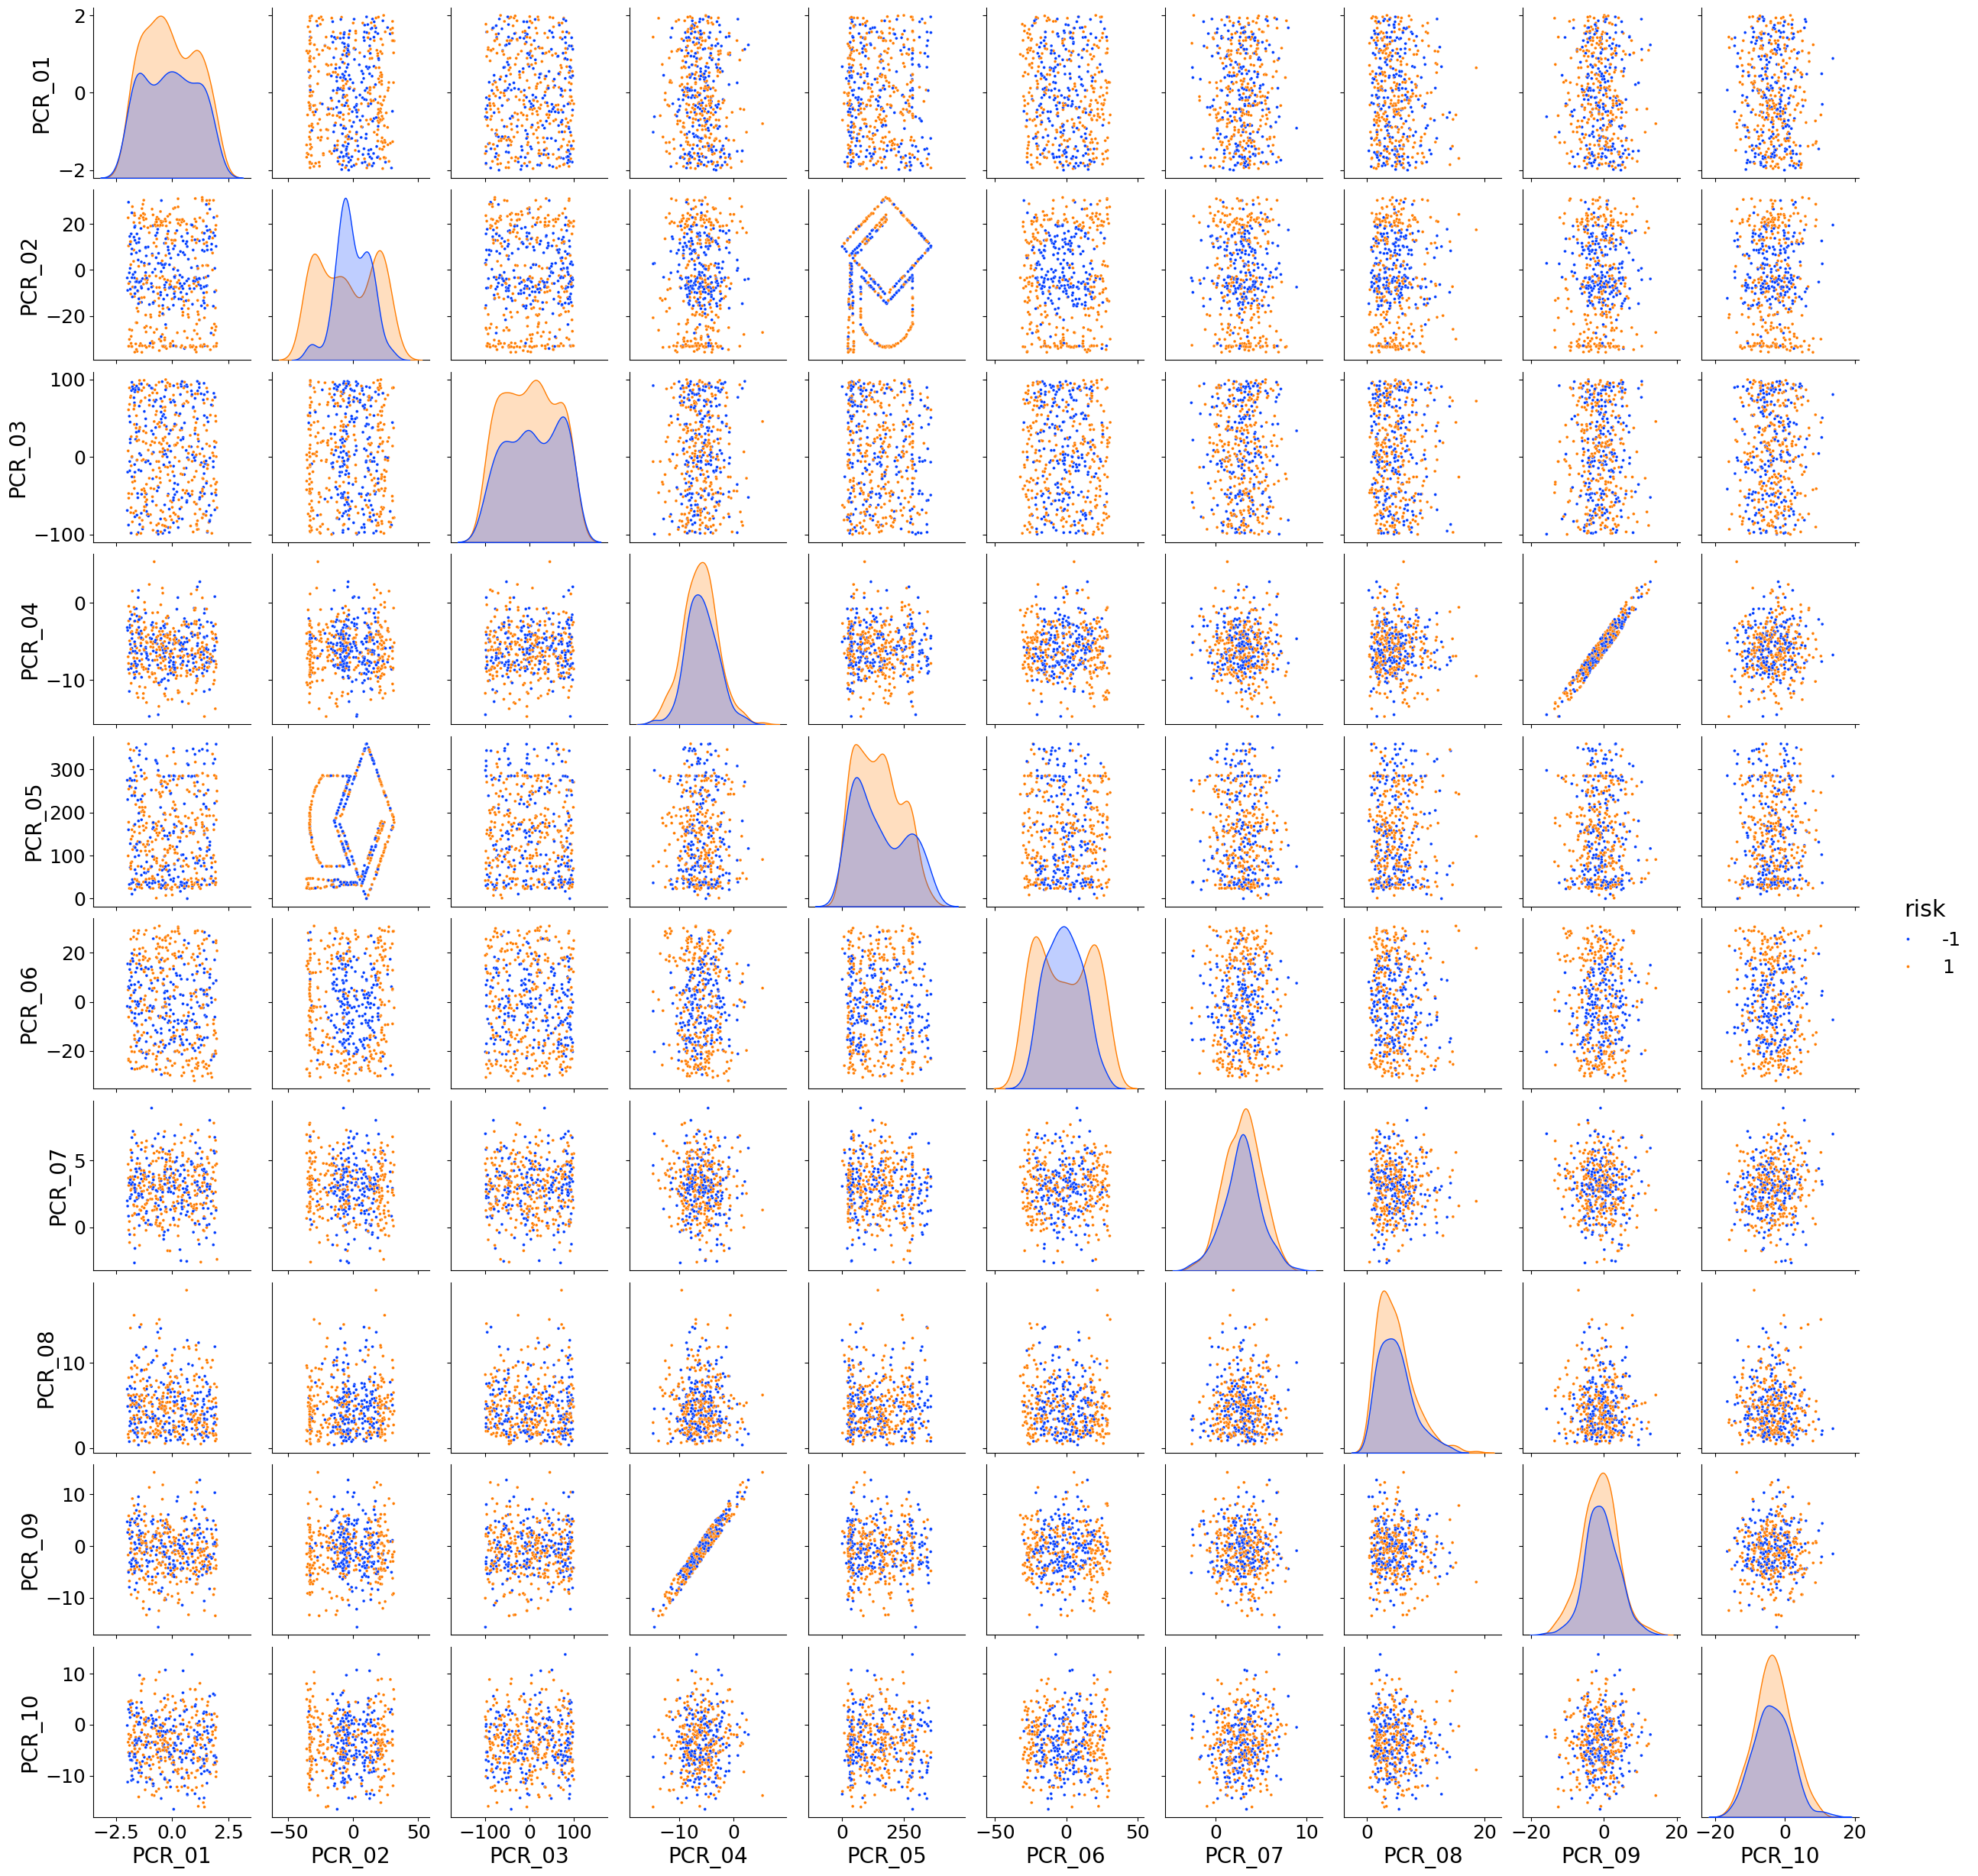

In [69]:
# Split by blood groups and plot PCRs

SpecialProperty_true = train_data[train_data['SpecialProperty'] == 1]

SpecialProperty_false = train_data[train_data['SpecialProperty'] == 0]

sns.pairplot(SpecialProperty_false[SpecialProperty_false.filter(like='PCR').columns.tolist() + ["risk"]],
 plot_kws={"s": 8}, palette="bright",hue="risk")

sns.pairplot(SpecialProperty_true[SpecialProperty_true.filter(like='PCR').columns.tolist() + ["risk"]],
 plot_kws={"s": 8},palette="bright", hue="risk")

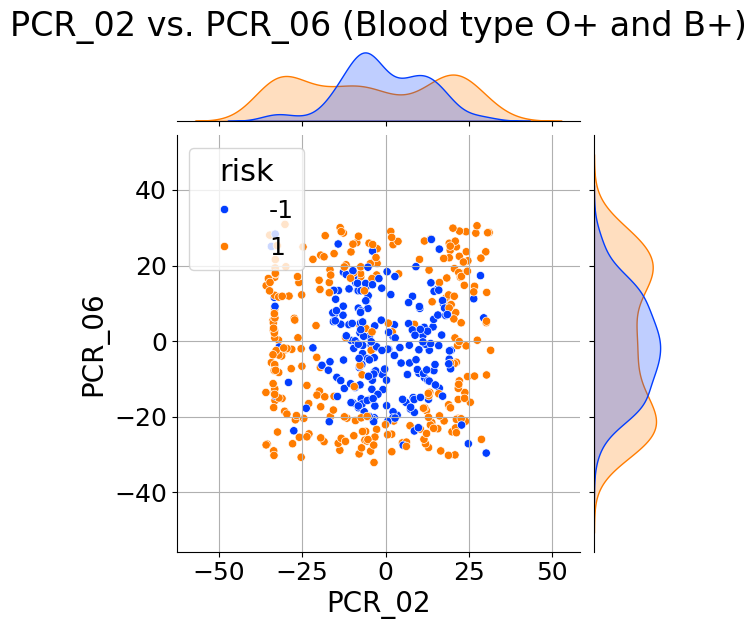

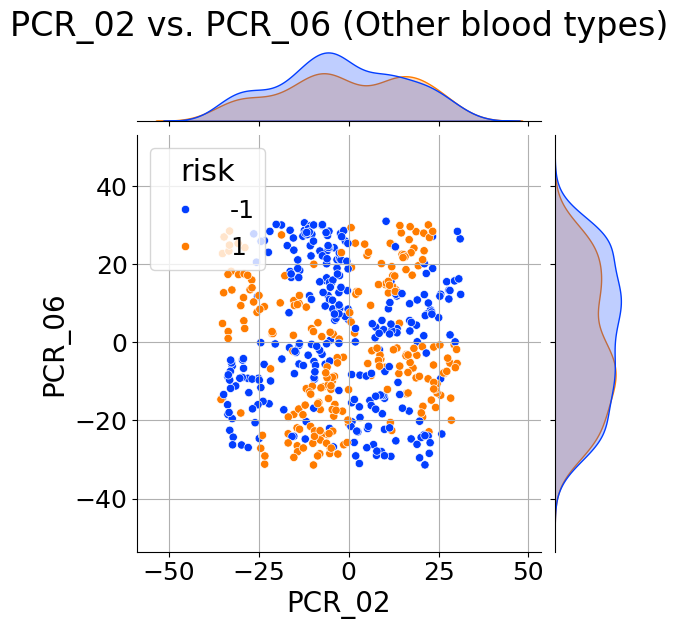

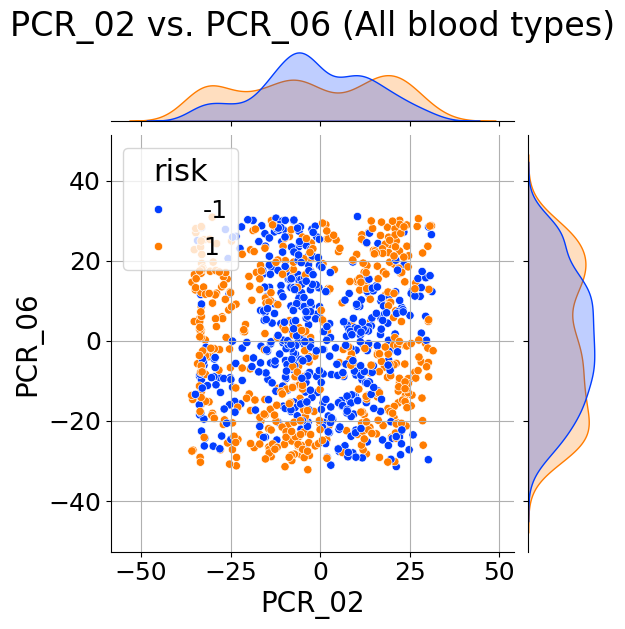

In [70]:
# Question 17 plots

# First joint plot for blood types O+ and B+
sns.jointplot(x="PCR_02", y="PCR_06", data=SpecialProperty_true, hue="risk", palette="bright")
plt.suptitle('PCR_02 vs. PCR_06 (Blood type O+ and B+)', y=1.04)
plt.grid()
plt.show()

# Second joint plot for the other blood group
sns.jointplot(x="PCR_02", y="PCR_06", data=SpecialProperty_false, hue="risk", palette="bright")
plt.suptitle('PCR_02 vs. PCR_06 (Other blood types)', y=1.04)
plt.grid()
plt.show()

# Third joint plot for all blood types
sns.jointplot(x="PCR_02", y="PCR_06", data=train_data, hue="risk", palette="bright")
plt.suptitle('PCR_02 vs. PCR_06 (All blood types)', y=1.04)
plt.grid()
plt.show()

In [71]:
# plot3d

def plot3d(df, colX, colY, colZ, title, hue=None, s=1):
  %matplotlib inline

  fig = plt.figure(figsize=(20, 4))
  axes = [fig.add_subplot(1, 4, 1, projection='3d'),
          fig.add_subplot(1, 4, 2, projection='3d'),
          fig.add_subplot(1, 4, 3, projection='3d'),
          fig.add_subplot(1, 4, 4, projection='3d')]

  palette = sns.color_palette("hls", 2)

  for i,ax in enumerate(axes):
    if hue is None:
      ax.scatter3D(df[colX], df[colY], df[colZ], color=palette[0], s=s)
    else:
      idx = df[hue] == True
      df1 = df[idx]
      df2 = df[~idx]

      ax.scatter3D(df1[colX], df1[colY], df1[colZ], color=palette[0], s=s)
      ax.scatter3D(df2[colX], df2[colY], df2[colZ], color=palette[1], s=s)

    if i == 3 or i == 1:
      ax.set_xlabel(colX, labelpad=20)
      ax.set_ylabel(colY, labelpad=20)
    else:
      ax.xaxis.set_ticklabels([])
      ax.yaxis.set_ticklabels([])

    ax.view_init(elev=5., azim=45*i+15)

  axes[1].set_zlabel("\n" + colZ, labelpad=1)

  plt.suptitle(title)
  plt.subplots_adjust(wspace=0.1, top=0.99)
  plt.show()

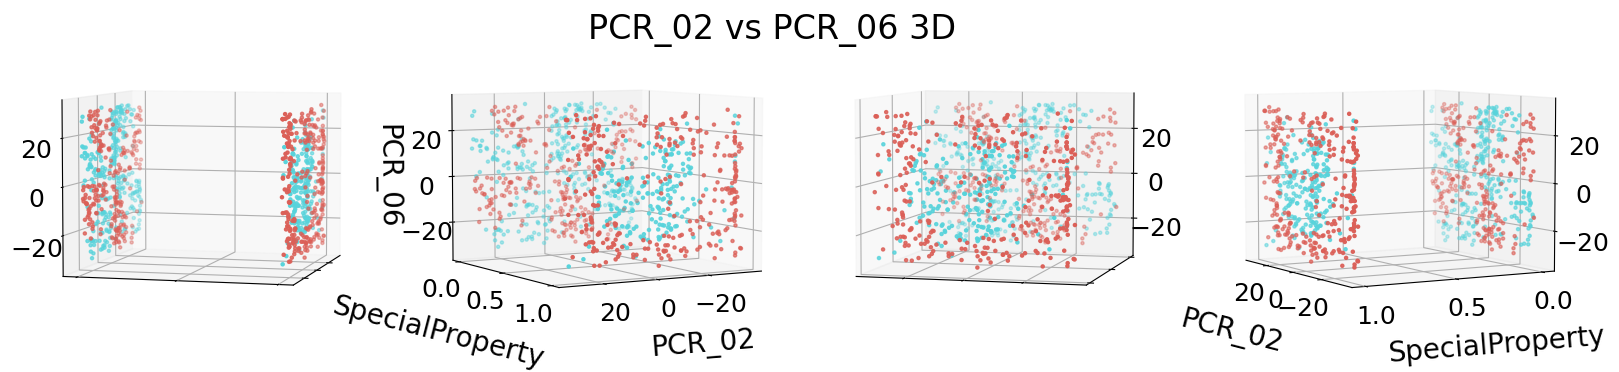

In [72]:
# 3D plot
plot3d(train_data, "PCR_02", "SpecialProperty", "PCR_06", title="PCR_02 vs PCR_06 3D", hue="risk", s=5)

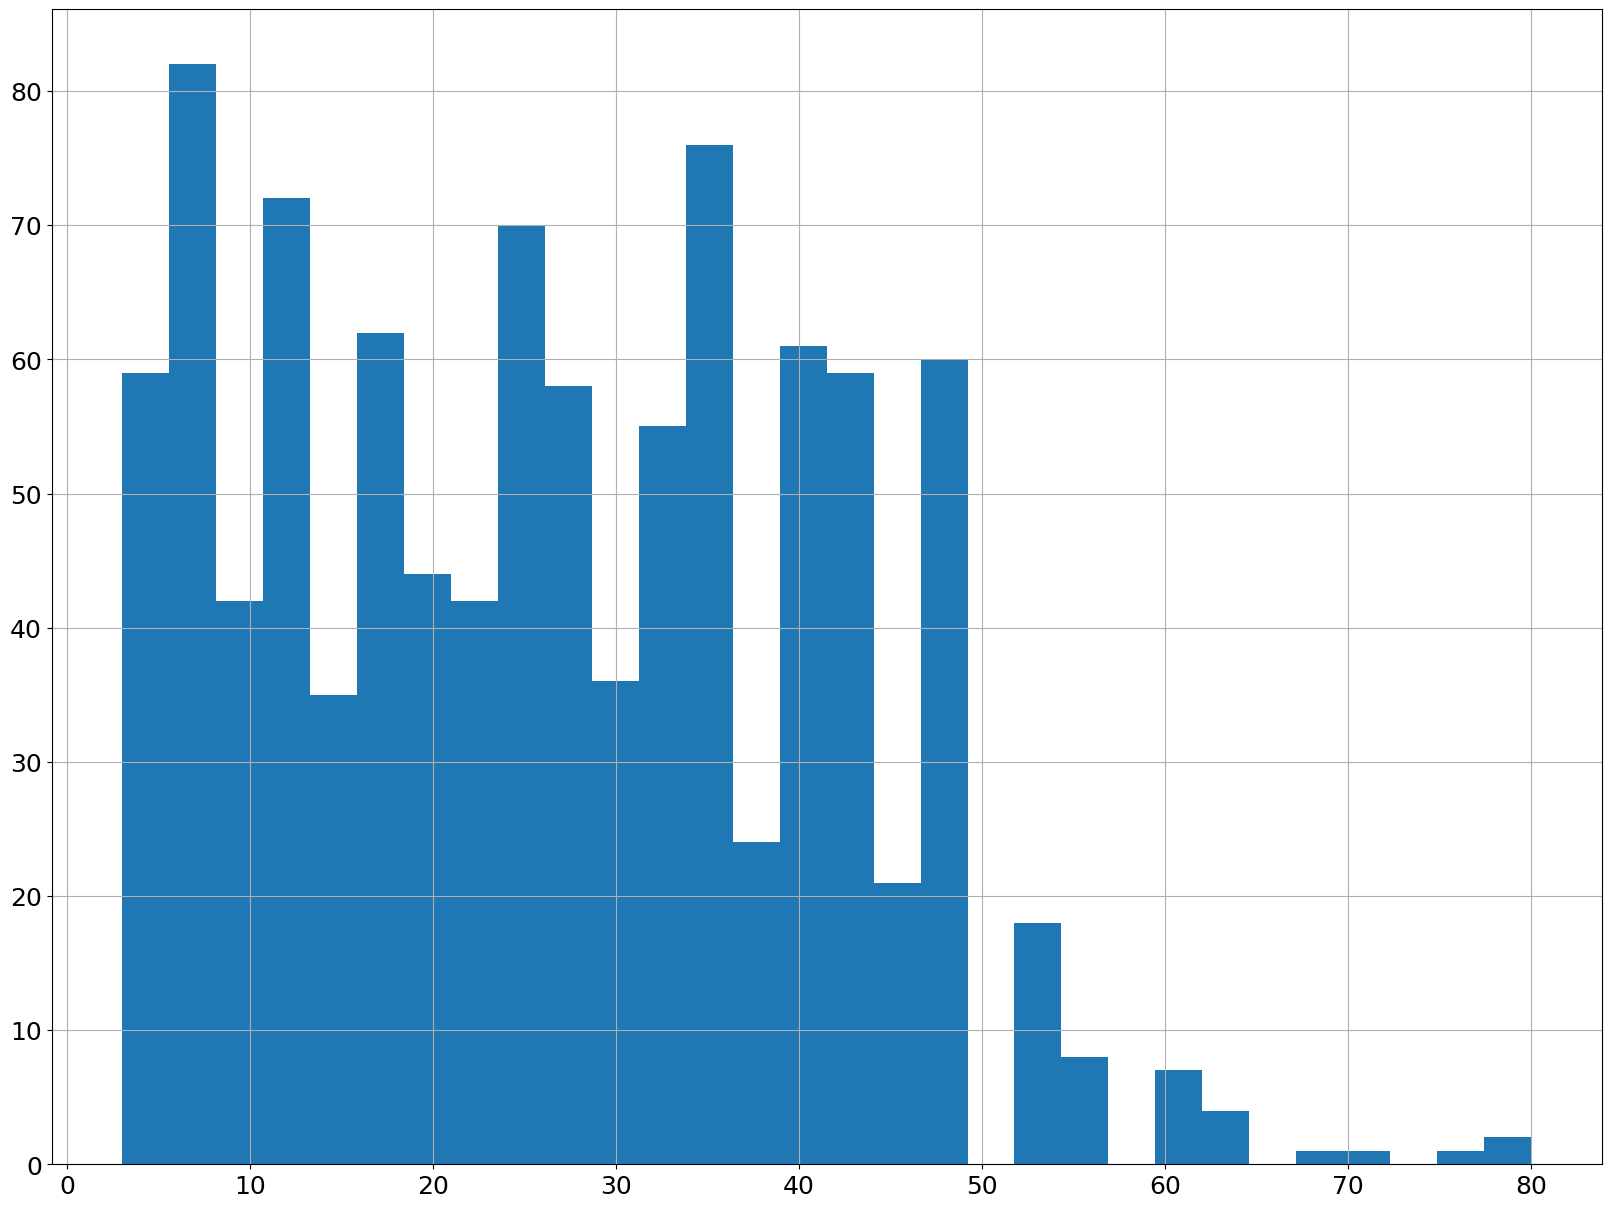

In [73]:
# Univarative analysis of age BEFORE normalization
train_data["age"].hist(bins=30, figsize=(20,15))
plt.show()

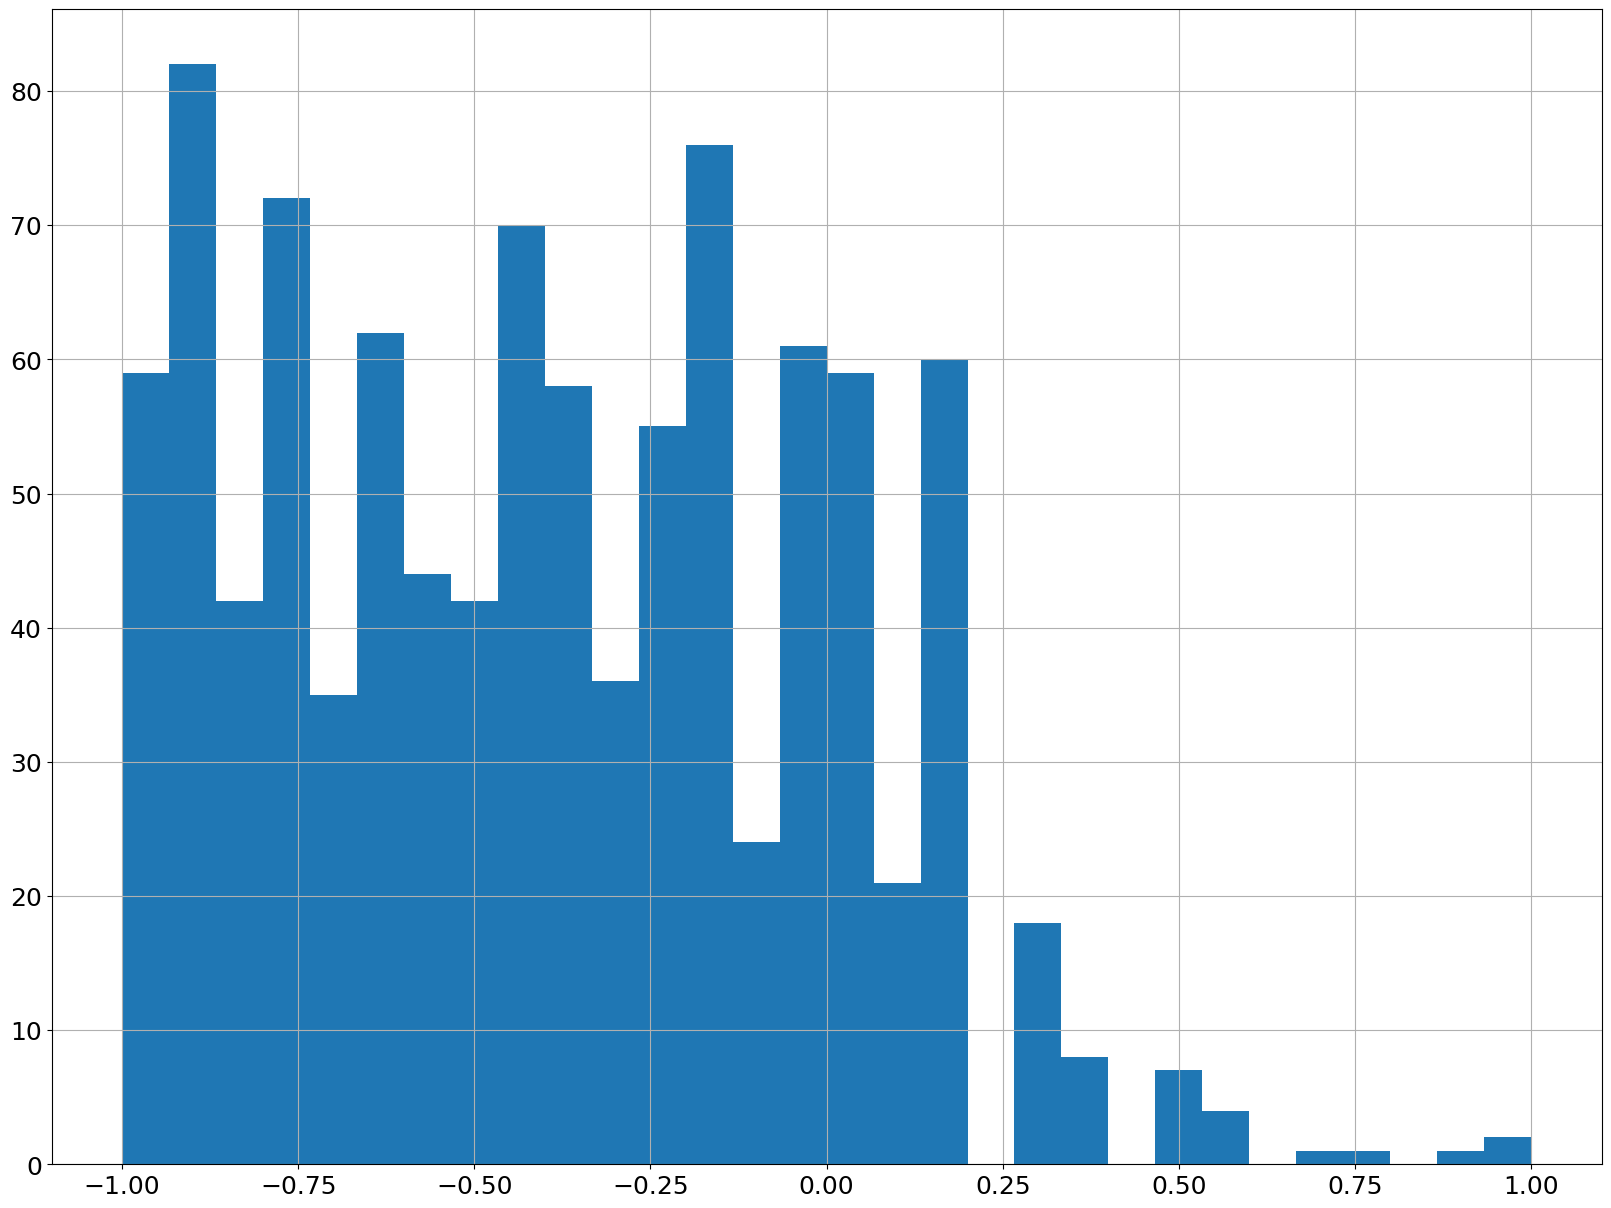

In [74]:
# Rest of features Normalization
features_to_minmax_normalize = ["PCR_01","PCR_02", "PCR_03", "PCR_06",
        "SpecialProperty", "sore_throat", "shortness_of_breath", "cough", "smell_loss",
                                "fever", "male"]

featurs_to_std_normalize = ['age', 'weight','num_of_siblings',
       'happiness_score', 'household_income', 'conversations_per_day',
       'sugar_levels', 'sport_activity',
       'PCR_04', 'PCR_05', 'PCR_07', 'PCR_08', 'PCR_09', 'PCR_10']

standartScaler = StandardScaler()
minmaxScaler = MinMaxScaler((-1,1))

train_data[featurs_to_std_normalize] = minmaxScaler.fit_transform(train_data[featurs_to_std_normalize])

train_data[features_to_minmax_normalize] = minmaxScaler.fit_transform(train_data[features_to_minmax_normalize])


# Univarative analysis of age AFTER normalization
train_data["age"].hist(bins=30, figsize=(20,15))
plt.show()

# minmax - pcr 01,02,03,06, SpecialProperty, sore_throat, shortness_of_breath, cough, smell_loss, fever, male

